In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"monthly milk production.csv",index_col="Date", parse_dates=True)

In [4]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [6]:
df.loc["1968"]

,Production
Date,
1968-01-01,717
1968-02-01,696
1968-03-01,775
1968-04-01,796
1968-05-01,858
1968-06-01,826
1968-07-01,783
1968-08-01,740
1968-09-01,701


In [7]:
df.loc["1968"].mean()

Production    748.833333
dtype: float64

In [8]:
df.loc["1970-04":"1972-08"]

,Production
Date,
1970-04-01,824
1970-05-01,886
1970-06-01,859
1970-07-01,819
1970-08-01,783
1970-09-01,740
1970-10-01,747
1970-11-01,711
1970-12-01,751


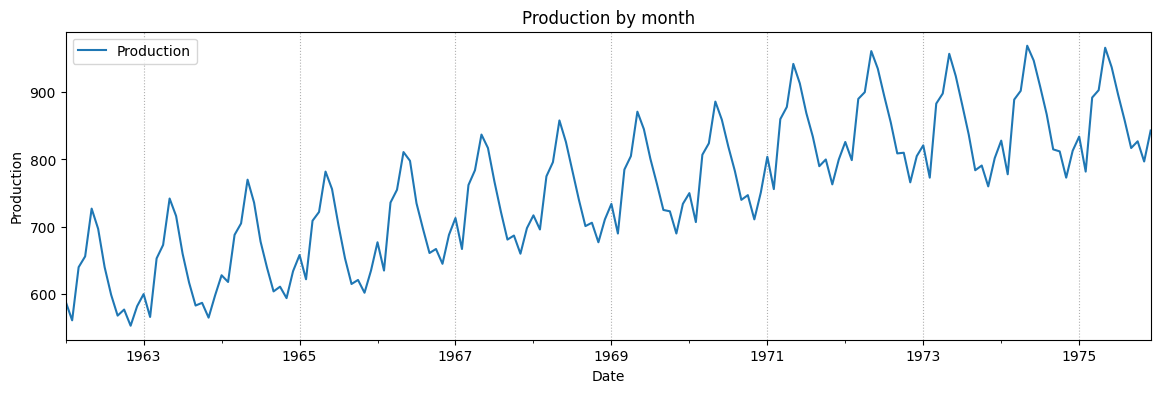

In [9]:
df.plot(figsize=(14, 4), title="Production by month", ylabel="Production")
plt.grid(axis="x", ls=":")

In [10]:
result = seasonal_decompose(df)

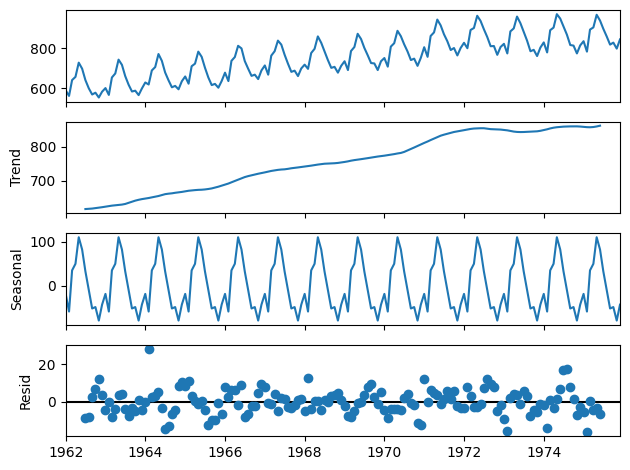

In [11]:
result.plot();

In [12]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [13]:
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [14]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [15]:
train.min()

Production    553
dtype: int64

In [16]:
train.max()

Production    969
dtype: int64

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(train)

MinMaxScaler()

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [20]:
scaled_train

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [21]:
scaled_test

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [22]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=12, batch_size=1)

In [23]:
inp, out = generator[0]

In [24]:
inp

array([[[0.08653846],
        [0.01923077],
        [0.20913462],
        [0.24759615],
        [0.41826923],
        [0.34615385],
        [0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231],
        [0.        ],
        [0.06971154]]])

In [25]:
out

array([[0.11298077]])

In [26]:
inp2, out2 = generator[1]

In [27]:
inp2

array([[[0.01923077],
        [0.20913462],
        [0.24759615],
        [0.41826923],
        [0.34615385],
        [0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231],
        [0.        ],
        [0.06971154],
        [0.11298077]]])

In [28]:
out2

array([[0.03125]])

In [29]:
inp.shape


(1, 12, 1)

In [30]:
out.shape

(1, 1)

In [31]:
model = Sequential([
    LSTM(3000, activation="relu", input_shape=((12,1))),
    Dense(1)
])

In [32]:
model.compile(optimizer="adam", loss="mse")

In [33]:
model.fit(generator, epochs=20)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 103s 666ms/step - loss: 0.0919
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 98s 677ms/step - loss: 0.0192
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 79s 546ms/step - loss: 0.0194
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 68s 473ms/step - loss: 0.0045
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 68s 475ms/step - loss: 0.0034
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 68s 475ms/step - loss: 0.0026
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 69s 476ms/step - loss: 0.0044
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 68s 472ms/step - loss: 0.0017
Epoch 9/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 68s 473ms/step - loss: 0.0031
Epoch 10/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 68s 473ms/step - loss: 0.0021
Epoch 11/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 68s 474ms/step - loss: 0.0037
Epoch 12/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 69s 476ms/step - loss: 0.0046
Epoch 13/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 68s 471ms/step - loss: 0.0018
Epoch 14/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 68s 469ms/step - loss: 0.0041
Epoch 15/20
14

In [34]:
last_train_batch = scaled_train[-12:]
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [35]:
last_train_batch = last_train_batch.reshape((1,12,1))

In [36]:
last_train_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [38]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


array([[0.6773419]], dtype=float32)

In [39]:
scaled_test[0]

array([0.67548077])

In [41]:
test_pred = []

In [42]:
first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1,12,1))


In [43]:
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]

    test_pred.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :,], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


In [44]:
test_pred

[array([0.6773419], dtype=float32),
 array([0.5885177], dtype=float32),
 array([0.8013551], dtype=float32),
 array([0.84579396], dtype=float32),
 array([0.9702573], dtype=float32),
 array([0.93762505], dtype=float32),
 array([0.8550054], dtype=float32),
 array([0.76956093], dtype=float32),
 array([0.6615348], dtype=float32),
 array([0.64528424], dtype=float32),
 array([0.570812], dtype=float32),
 array([0.642365], dtype=float32)]

In [45]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [47]:
true_pred = scaler.inverse_transform(test_pred)
true_pred

array([[834.77422142],
       [797.82337379],
       [886.36373138],
       [904.85028839],
       [956.62702942],
       [943.05202103],
       [908.68223953],
       [873.13734818],
       [828.19847107],
       [821.43824196],
       [790.45778656],
       [820.22383118]])

In [48]:
test["prediction"] = true_pred

In [49]:
test

,Production,prediction
Date,,
1975-01-01,834,834.774221
1975-02-01,782,797.823374
1975-03-01,892,886.363731
1975-04-01,903,904.850288
1975-05-01,966,956.627029
1975-06-01,937,943.052021
1975-07-01,896,908.682240
1975-08-01,858,873.137348
1975-09-01,817,828.198471


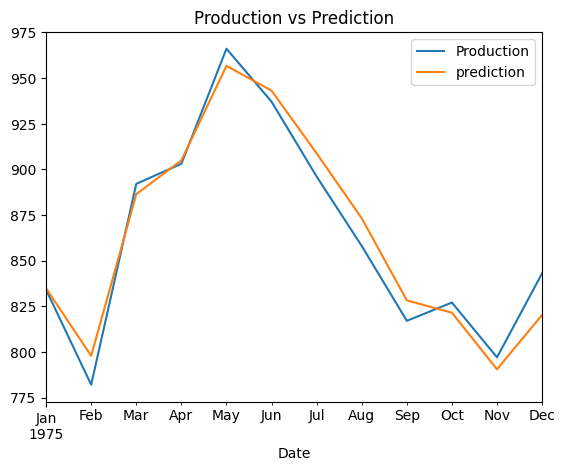

In [50]:
test.plot(title ="Production vs Prediction")
plt.show()

In [60]:
root_mean_squared_error(test["Production"], test["prediction"])

np.float64(11.249151979891735)

In [61]:
test.mean()

Production    862.666667
prediction    863.802382
dtype: float64

In [62]:
lower = test["Production"].mean() - rmse
upper = test["prediction"].mean() + rmse

In [63]:
lower, upper

(np.float64(851.4175146867749), np.float64(875.0515339722318))